In [19]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [20]:
import torch
import torchvision
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

#Step1. Input tensor와 Target tensor 준비(훈련데이터)
* MNIST 데이터셋 Download

In [2]:
# tensorflow datasets
# 1. MNIST dataset numpy ndarray 형태로 제공
# 2. (train, test) 묶음으로 제공
(train_images, train_labels),(test_images, test_labels) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* 데이터 확인

In [3]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
train_labels[0]

5

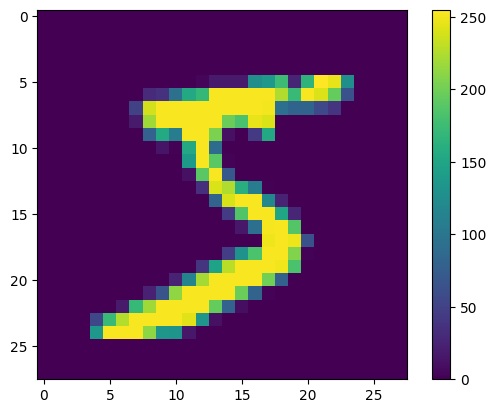

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#step 2. 데이터의 전처리
* 2-D Tensor를 1-D Tensor로 변환(?)
  * (60000,28,28) -> (60000, 28*28)
  

In [8]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [9]:
test_images.shape, test_images.shape

((10000, 784), (10000, 784))

# step 3. batch 구성을 위한 데이터 pipeline 생성
* 학습데이터를 torch.Tensor 객체로 변환
* 변한 된 torch.Tensor 객체를 DataSet 객체에 연결
* Batch 구성을 위한 DataLoader 객체 생성

___
## torch method를 적용하기 위해 ndarray 객체를 tensor 객체로 type 변경

In [10]:
train_x = torch.Tensor(train_images)
# 정답(label)은 정수형 tensor가 되기를 원함
# but .Tensor 객체는 자동으로 float 변환
# 이를 방지하기위해 LongTensor 이용
train_y = torch.LongTensor(train_labels)

test_x = torch.Tensor(test_images)
test_y = torch.LongTensor(test_labels)

type이 tensor로 변환되었는지 확인

In [11]:
type(train_x), type(train_y)

(torch.Tensor, torch.Tensor)

##pipeline에 위 tensor data와 연결
  * dataset 객체에 tensor data가 저장x
  * dataset 객체에 tensor data 주소가 저장되어 연결되는 것.

###Dataset -> 데이터를 한 건씩만 load
  * argument : 데이터 전체

In [12]:
train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
test_dataset = torch.utils.data.TensorDataset(test_x, test_y)

제대로 Dataset과 tensor이 연결되었는지 확인

In [13]:
x,y =next(iter(train_dataset))
x.shape, y.shape

(torch.Size([784]), torch.Size([]))

###Dataloader -> 데이터를 여러 건 load
  * argument
    * 위에서 제작했던 dataset
    * batch_size = 몇 개씩 불러올것인지
    * shuffle = True or False

In [14]:
batch_size = 64

In [15]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                            batch_size=batch_size,
                            shuffle=True)

# test는 데이터가 모두 검증되어야 하고, 데이터읭 순서와 검증 점수는 차이x
# shuffle 안해도 됨
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                            batch_size=batch_size,
                            shuffle=False)


load한 데이터들 확인->output : [64, 크기]

In [16]:
x, y = next(iter(train_dataloader))
x.shape, y.shape

(torch.Size([64, 784]), torch.Size([64]))

#4. step4. DNN 모델 제작

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class DNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
                nn.Linear(28*28 ,256),
                nn.ReLU(),
                nn.Linear(512,128),
                nn.ReLU(),
                nn.Linear(128,10)
    )

  def forward(self, x)
    x = self.model(x)
    x = torch.softmax(x, dim=1)
    return x

  def train(self)
    self.train()
